# Exploratory Data Analysis - Blood Donation

In [8]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [17]:
file_in = 'C:\\Users\\Jenny\\Documents\\Mathfreak_Data\\DataKind\\BloodDonation\\train.csv'
numerical_features = ['Months since Last Donation', 'Number of Donations', 'Total Volume Donated (c.c.)',  'Months since First Donation']


data = pd.read_csv(file_in)
data.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
data.corr()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
ID,1.000000,-0.010283,0.040897,0.040897,0.048948
Months since Last Donation,-0.010283,1.000000,-0.225752,-0.225752,0.099412
Number of Donations,0.040897,-0.225752,1.000000,1.000000,0.682757
Total Volume Donated (c.c.),0.040897,-0.225752,1.000000,1.000000,0.682757
Months since First Donation,0.048948,0.099412,0.682757,0.682757,1.000000


Populating the interactive namespace from numpy and matplotlib


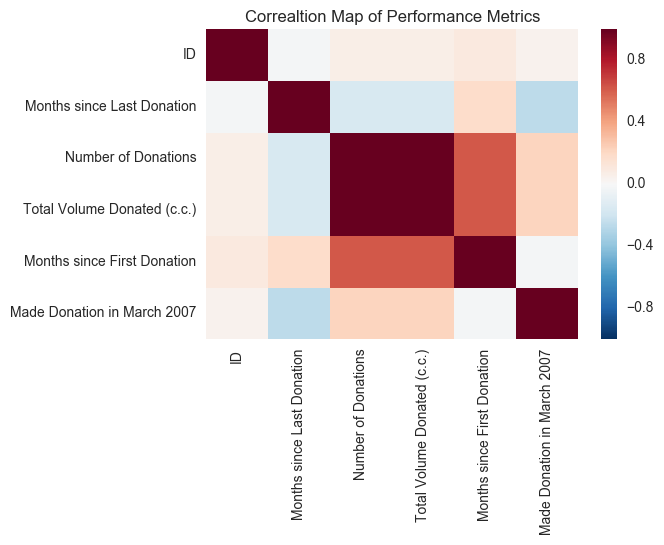

In [18]:
%pylab inline
corr = data.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correaltion Map of Performance Metrics')
plt.show()

Populating the interactive namespace from numpy and matplotlib


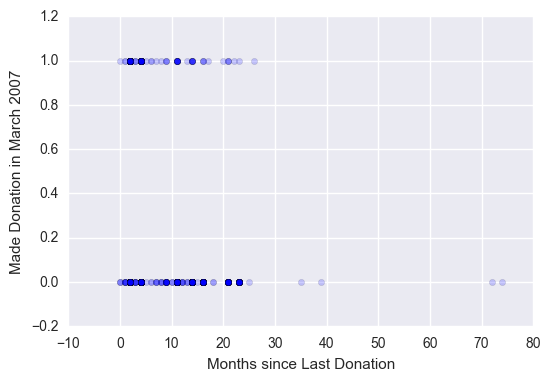

In [39]:
%pylab inline
plt.figure()
ax = plt.gca()
plt.scatter(data['Months since Last Donation'], data['Made Donation in March 2007'], alpha=0.2)
#ax.set_xlim([0, 30])
ax.set_xlabel('Months since Last Donation')
ax.set_ylabel('Made Donation in March 2007')
#plt.title('Relationship between Batting Average and Salary')
plt.show()

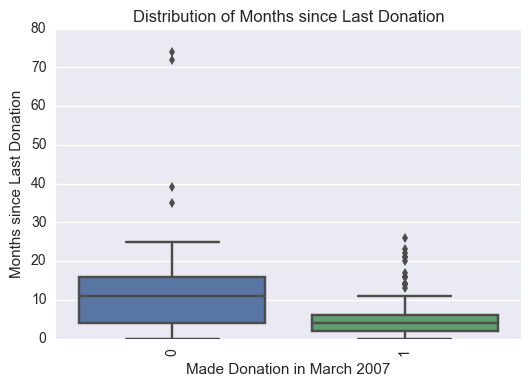

In [25]:
g = sns.boxplot(x='Made Donation in March 2007', y='Months since Last Donation', data=data)
plt.xlabel('Made Donation in March 2007', rotation='horizontal')
plt.xticks(rotation=90)
plt.title('Distribution of Months since Last Donation')
plt.show()

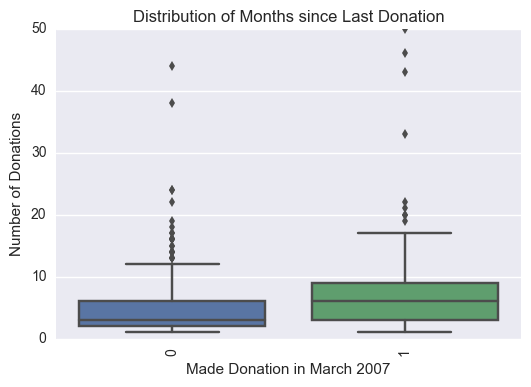

In [29]:
g = sns.boxplot(x='Made Donation in March 2007', y='Number of Donations', data=data)
plt.xlabel('Made Donation in March 2007', rotation='horizontal')
plt.xticks(rotation=90)
plt.title('Distribution of Months since Last Donation')
plt.show()

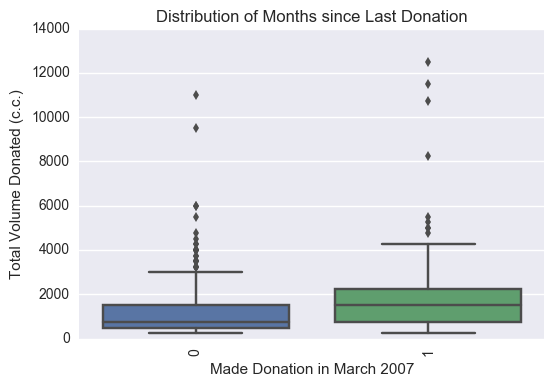

In [30]:
g = sns.boxplot(x='Made Donation in March 2007', y='Total Volume Donated (c.c.)', data=data)
plt.xlabel('Made Donation in March 2007', rotation='horizontal')
plt.xticks(rotation=90)
plt.title('Distribution of Months since Last Donation')
plt.show()

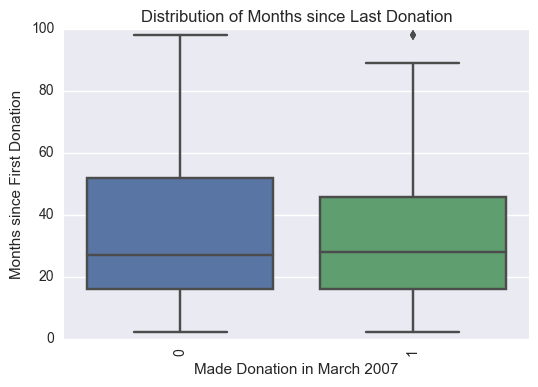

In [31]:
g = sns.boxplot(x='Made Donation in March 2007', y='Months since First Donation', data=data)
plt.xlabel('Made Donation in March 2007', rotation='horizontal')
plt.xticks(rotation=90)
plt.title('Distribution of Months since Last Donation')
plt.show()

Populating the interactive namespace from numpy and matplotlib


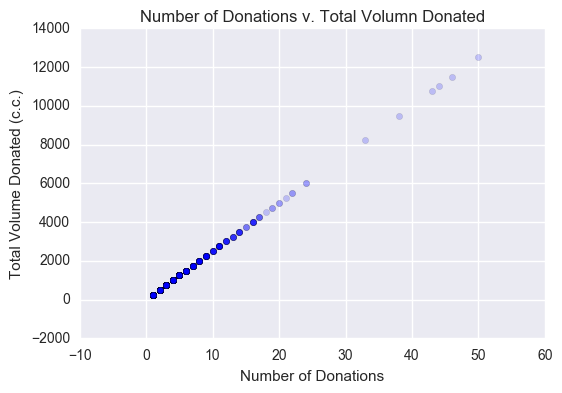

In [34]:
%pylab inline
plt.figure()
ax = plt.gca()
plt.scatter(data['Number of Donations'], data['Total Volume Donated (c.c.)'], alpha = 0.2)
#ax.set_ylim([min(df['salary']), df['salary'].quantile(0.90)])
ax.set_xlabel('Number of Donations')
ax.set_ylabel('Total Volume Donated (c.c.)')
plt.title('Number of Donations v. Total Volumn Donated')
plt.show()

Populating the interactive namespace from numpy and matplotlib


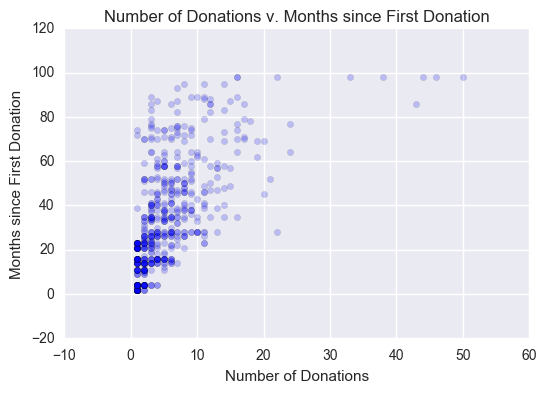

In [37]:
%pylab inline
plt.figure()
ax = plt.gca()
plt.scatter(data['Number of Donations'], data['Months since First Donation'], alpha = 0.2)
#ax.set_ylim([min(df['salary']), df['salary'].quantile(0.90)])
ax.set_xlabel('Number of Donations')
ax.set_ylabel('Months since First Donation')
plt.title('Number of Donations v. Months since First Donation')
plt.show()

In [80]:
import sklearn.preprocessing
data_x = preprocessing.PolynomialFeatures(2).fit_transform(data)
print(data_x)
print(data_x.shape)

[[  1.00000000e+00   6.19000000e+02   2.00000000e+00 ...,   9.60400000e+03
    9.80000000e+01   1.00000000e+00]
 [  1.00000000e+00   6.64000000e+02   0.00000000e+00 ...,   7.84000000e+02
    2.80000000e+01   1.00000000e+00]
 [  1.00000000e+00   4.41000000e+02   1.00000000e+00 ...,   1.22500000e+03
    3.50000000e+01   1.00000000e+00]
 ..., 
 [  1.00000000e+00   3.60000000e+02   2.10000000e+01 ...,   2.70400000e+03
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   5.41000000e+02   3.90000000e+01 ...,   1.52100000e+03
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   7.40000000e+01   7.20000000e+01 ...,   5.18400000e+03
    0.00000000e+00   0.00000000e+00]]
(576, 28)


In [77]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import KFold
#from sklearn.cross_validation import StratifiedShuffleSplit

numerical_features = ['Months since Last Donation', 'Number of Donations', 'Total Volume Donated (c.c.)',  'Months since First Donation']
y = data['Made Donation in March 2007']
X = data.loc[:,numerical_features]
X_x = data_x
#sss = StratifiedShuffleSplit(y, n_iter=50, test_size=0.1)

searchCV = LogisticRegressionCV(
    Cs=list(np.power(10.0, np.arange(-10, 10)))
     ,penalty='l1'
    ,scoring='f1'
    #,cv=sss
    ,random_state=777
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='liblinear'
    ,tol=1e-4
)
    
searchCV.fit(X_x, y)

print ('Max f1:', searchCV.scores_[1].max())

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Max f1: 1.0


In [78]:
searchCV.coef_ 

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -1.89819792e-02,   0.00000000e+00,
          0.00000000e+00,  -8.60631191e-06,   1.69034775e-05,
          0.00000000e+00,  -1.44946646e-05,   2.46463225e-04,
          1.25861595e-02,   0.00000000e+00,   0.00000000e+00,
         -6.16867562e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.06117783e-04,   0.00000000e+00,
          0.00000000e+00,  -1.80246591e-06,   4.61022378e-05,
          3.84521281e-02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]])

In [83]:
print(searchCV.coef_.shape)

(1, 28)
